<a href="https://colab.research.google.com/github/juandahur/ML-UdeA-Reto-Tec/blob/main/Reto_Tecnologico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RETO TECNÓLOGICO
##Alejandro Correa - Juan David Hurtado 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import json

In [12]:
airports = pd.read_csv('https://davidmegginson.github.io/ourairports-data/airports.csv')
airports_freq = pd.read_csv('https://davidmegginson.github.io/ourairports-data/airport-frequencies.csv')
runways = pd.read_csv('https://davidmegginson.github.io/ourairports-data/runways.csv')
countries = pd.read_csv('https://davidmegginson.github.io/ourairports-data/countries.csv')
regions = pd.read_csv('https://davidmegginson.github.io/ourairports-data/regions.csv')
iso_countries = pd.read_csv('https://datahub.io/core/country-list/r/data.csv')
departures_MDE_nal = pd.read_csv('http://medata.gov.co/sites/default/files/medata_harvest_files/salida_mensual_pasajeros_aeropuertos_destino_nacional.csv',sep=';')
ticket_dataset = pd.read_csv('/content/sample_data/ticket_dataset_MOW.csv',sep=';')

with open('/content/sample_data/IATA_Airlines.json','r') as f:
    data = json.loads(f.read())

airlines = pd.json_normalize(data, max_level=1)



#BASE DE DATOS AERONAÚTICA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#origen_destino = pd.read_csv('/content/sample_data/BD.xlsx')
#ticket_dataset = pd.read_csv('/content/ticket_dataset_MOW.csv',sep=';')
origen_destino = pd.read_excel('/content/sample_data/BD.xlsx')



In [ ]:
origen_destino.head()

,Sigla Empresa,Nombre,Fecha,Año,Número de Mes,Origen,Nombre.1,Ciudad Origen,Pais Origen,Destino,Nombre.2,Ciudad Destino,Pais Destino,Tráfico (N/I),Tipo Vuelo,Pasajeros,Carga + Correo (Kg)
0,AVA,AVIANCA,2021-12-01,2021,12,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,68743.0,345188.0
1,AVA,AVIANCA,2021-12-01,2021,12,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,N,R,67959.0,182750.0
2,AVA,AVIANCA,2021-11-01,2021,11,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,N,R,64290.0,169692.0
3,AVA,AVIANCA,2021-11-01,2021,11,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,63649.0,330573.0
4,AVA,AVIANCA,2021-10-01,2021,10,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,58747.0,206382.0


##1. Agrupe los vuelos por ciudad de destino

In [ ]:
popularidad = origen_destino.groupby('Ciudad Destino').size().to_frame('Cuenta').reset_index()
popularidad.columns

Index(['Ciudad Destino', 'Cuenta'], dtype='object')

In [ ]:
popularidad.sort_values("Cuenta",ascending=False,inplace=True)
popularidad2 = popularidad.head(5)
popularidad2

,Ciudad Destino,Cuenta
60,BOGOTA,11687
360,RIONEGRO - ANTIOQUIA,3594
262,MITU,2606
79,CALI,2225
88,CARTAGENA,2119


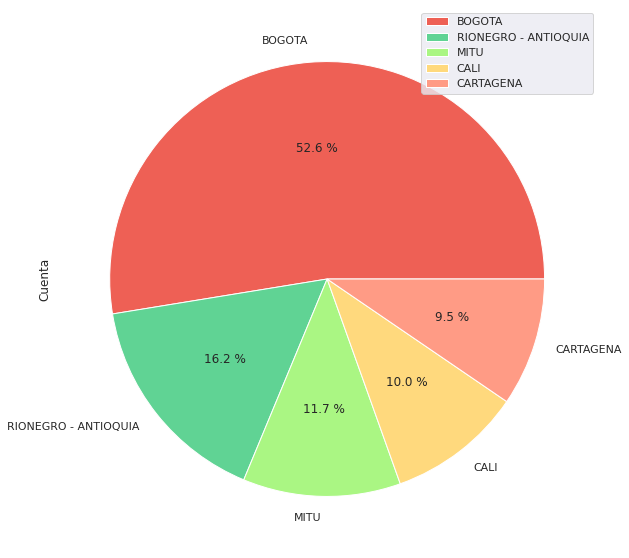

In [ ]:
colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
popularidad2.plot(kind='pie', y='Cuenta',labels=popularidad2['Ciudad Destino'],autopct="%0.1f %%", colors= colores)

##2. Liste los vuelos por aerolínea con destino Rionegro

In [ ]:
Rionegro = origen_destino[origen_destino['Ciudad Destino'] == 'RIONEGRO - ANTIOQUIA']
Rionegro

,Sigla Empresa,Nombre,Fecha,Año,Número de Mes,Origen,Nombre.1,Ciudad Origen,Pais Origen,Destino,Nombre.2,Ciudad Destino,Pais Destino,Tráfico (N/I),Tipo Vuelo,Pasajeros,Carga + Correo (Kg)
0,AVA,AVIANCA,2021-12-01,2021,12,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,68743.0,345188.0
3,AVA,AVIANCA,2021-11-01,2021,11,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,63649.0,330573.0
4,AVA,AVIANCA,2021-10-01,2021,10,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,58747.0,206382.0
10,AVA,AVIANCA,2021-08-01,2021,8,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,53850.0,191554.0
11,AVA,AVIANCA,2021-09-01,2021,9,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,53213.0,208283.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63404,TPA,TAMPA CARGO S.A.S,2021-12-01,2021,12,CLO,CALI - ALFONSO BONILLA ARAGON,CALI,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,0.0,18301.0
63408,TPA,TAMPA CARGO S.A.S,2021-12-01,2021,12,MAO,EDUARDO GOMES INTL,MANAUS,BRASIL,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,I,R,0.0,1420.0
63413,TPA,TAMPA CARGO S.A.S,2021-12-01,2021,12,MIA,MIAMI INTL,MIAMI,ESTADOS UNIDOS,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,I,R,0.0,332872.0
63416,TPA,TAMPA CARGO S.A.S,2021-12-01,2021,12,SAL,EL SALVADOR INTL,SAN SALVADOR,EL SALVADOR,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,I,C,0.0,928.0


In [ ]:
aerolineas = Rionegro.groupby('Nombre').size().to_frame('Cantidad de vuelos').reset_index()
aerolineas.sort_values('Cantidad de vuelos',ascending=False,inplace=True)
aerolineas2 = aerolineas.head(15)
aerolineas2


,Nombre,Cantidad de vuelos
12,AMERICAN,866
15,AVIANCA,519
5,AEROMEXICO SUCURSAL COLOMBIA,473
47,SPIRIT AIRLINES,344
31,JETBLUE AIRWAYS CORPORATION,285
21,FAST COLOMBIA SAS,177
10,AIR EUROPA,163
11,AIRES,108
30,INTEREJECUTIVA,100
42,SEARCA S.A.,55


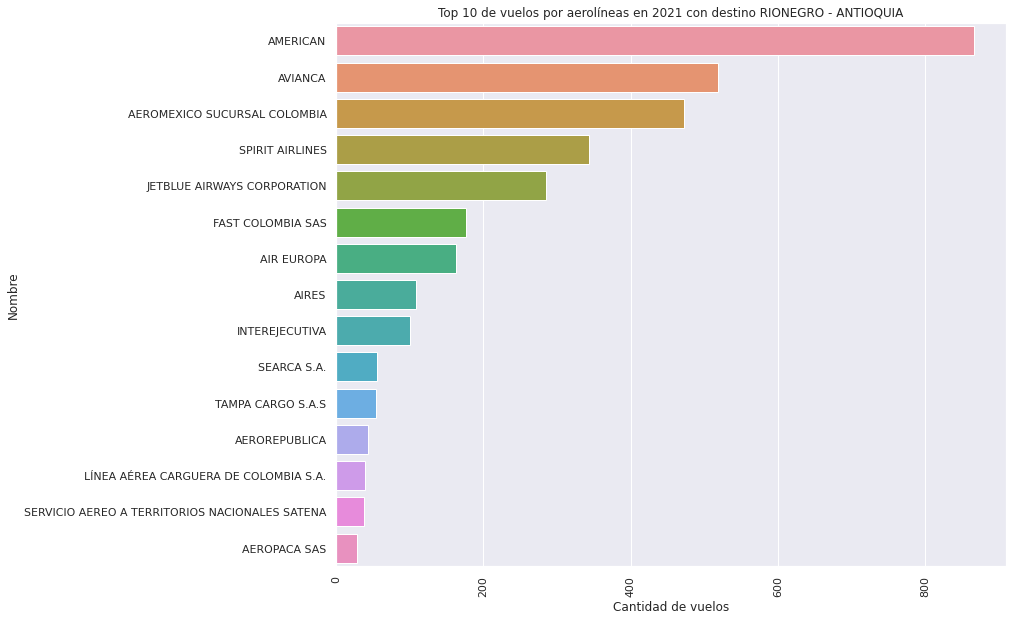

In [ ]:
sns.set(rc={"figure.figsize":(12,10)})
sns.barplot(x ="Cantidad de vuelos", y ="Nombre", data = aerolineas2)
plt.title("Top 10 de vuelos por aerolíneas en 2021 con destino RIONEGRO - ANTIOQUIA")
plt.xticks(rotation= 90);
plt.show()

##3. Listado de los vuelos por aerolínea , por la ciudad de destino, su cantidad de escalas, cantidad de pasajeros movilizados ordenados de mayor a menor y viceversa. El usuario debe elegir el orden de visualización. (Grafico de líneas)

In [ ]:
origen_destino[['Nombre','Fecha','Origen','Nombre.1','Pais Origen','Destino','Nombre.2','Pais Destino','Pasajeros']].sort_values('Pasajeros', ascending=False)

,Nombre,Fecha,Origen,Nombre.1,Pais Origen,Destino,Nombre.2,Pais Destino,Pasajeros
0,AVIANCA,2021-12-01,BOG,BOGOTA - ELDORADO,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,COLOMBIA,68743.0
1,AVIANCA,2021-12-01,MDE,RIONEGRO - JOSE M. CORDOVA,COLOMBIA,BOG,BOGOTA - ELDORADO,COLOMBIA,67959.0
2,AVIANCA,2021-11-01,MDE,RIONEGRO - JOSE M. CORDOVA,COLOMBIA,BOG,BOGOTA - ELDORADO,COLOMBIA,64290.0
3,AVIANCA,2021-11-01,BOG,BOGOTA - ELDORADO,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,COLOMBIA,63649.0
4,AVIANCA,2021-10-01,BOG,BOGOTA - ELDORADO,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,COLOMBIA,58747.0
...,...,...,...,...,...,...,...,...,...
63436,TAC,2021-01-01,TBQ,TIMBIQUI,COLOMBIA,CLO,CALI - ALFONSO BONILLA ARAGON,COLOMBIA,NaN
63437,AEROMENEGUA,2021-04-01,MVP,MITU,COLOMBIA,MTN,BUENOS AIRES - VAUPES,COLOMBIA,NaN
63438,TURKISH AIRLINES INC,2021-08-01,ABJ,ABIDJAN,COSTA DE MARFIL,BOG,BOGOTA - ELDORADO,COLOMBIA,NaN
63439,LAS,2021-10-01,LIM,CALLAO /INTL JORGE CHAVEZ,PERU,BOG,BOGOTA - ELDORADO,COLOMBIA,NaN


4. Dado un parámetro de entrada y orden seleccionado, liste la aerolínea con 
mayores y menores ingresos por ruta. 


5. Halle costo promedio de pasaje por vuelo, calcule el ingreso promedio por vuelo 
por ciudad de destino


In [13]:
ticket_dataset.head(5)

,Unnamed: 0,value,trip_class,origin,number_of_changes,gate,found_at,distance,destination,depart_date,airline,actual
0,0,10570.0,0,MOW,1.0,Kiwi.com,2022-02-09T07:12:09,0,SPU,25/02/2022,N4,True
1,1,7290.0,0,MOW,2.0,Kiwi.com,2022-02-03T12:52:42,0,SZF,23/02/2022,A4,True
2,2,8130.0,0,MOW,1.0,KupiBilet.ru,2022-02-09T07:10:22,0,ABA,21/02/2022,WZ,True
3,3,8220.0,0,MOW,1.0,Kiwi.com,2022-02-09T09:46:49,0,CAI,28/02/2022,DP,True
4,4,6819.0,0,MOW,2.0,Kiwi.com,2022-02-09T06:08:41,0,GZT,16/02/2022,DP,True


In [14]:
Valor_Promedio = ticket_dataset[['destination','value']].groupby('destination').mean().reset_index()

In [15]:
Valor_Promedio

,destination,value
0,AAL,12511.0
1,AAN,13387.0
2,AAQ,3233.0
3,AAR,11572.0
4,ABA,9884.2
...,...,...
957,ZTH,9306.5
958,НЖГ,15917.6
959,СЕН,13624.0
960,ТИО,13779.0


In [16]:
Valor_Promedio_g = Valor_Promedio.merge(
    airports[['municipality','iata_code']],
    left_on = 'destination',
    right_on = 'iata_code',
    how = 'left'
)[['municipality','value']].sort_values('value',ascending=False).head(30)

In [17]:
Valor_Promedio_g

,municipality,value
162,Zhengzhou,291808.000000
609,Oakland,206662.000000
584,Ningbo,156899.000000
433,Kunming,138334.000000
863,Tainan (Rende),114069.000000
337,Hamilton,98534.000000
371,Isla De Pascua,97271.000000
511,Lhasa,95112.000000
734,Babelthuap Island,94446.000000
103,Motu Mute,94101.000000


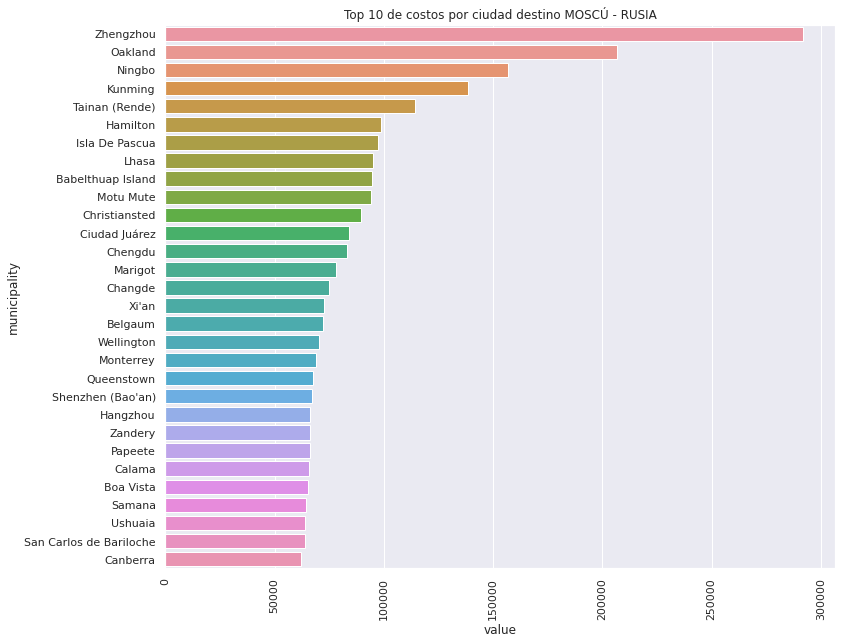

In [18]:
sns.set(rc={"figure.figsize":(12,10)})
sns.barplot(x ="value", y ="municipality", data = Valor_Promedio_g)
plt.title("Top 10 de costos por ciudad destino MOSCÚ - RUSIA")
plt.xticks(rotation= 90);
plt.show()

6. Entregue el total de pasajeros movilizados por inventario agrupado por categoría 
de producto.


7. Costo por ruta por aerolínea en un rango de tiempo ingresado por 
teclado

In [19]:
ticket_dataset.head(5)

,Unnamed: 0,value,trip_class,origin,number_of_changes,gate,found_at,distance,destination,depart_date,airline,actual
0,0,10570.0,0,MOW,1.0,Kiwi.com,2022-02-09T07:12:09,0,SPU,25/02/2022,N4,True
1,1,7290.0,0,MOW,2.0,Kiwi.com,2022-02-03T12:52:42,0,SZF,23/02/2022,A4,True
2,2,8130.0,0,MOW,1.0,KupiBilet.ru,2022-02-09T07:10:22,0,ABA,21/02/2022,WZ,True
3,3,8220.0,0,MOW,1.0,Kiwi.com,2022-02-09T09:46:49,0,CAI,28/02/2022,DP,True
4,4,6819.0,0,MOW,2.0,Kiwi.com,2022-02-09T06:08:41,0,GZT,16/02/2022,DP,True


In [20]:
ticket_dataset_completo = ticket_dataset[['destination','value','depart_date','airline']].groupby(['destination','airline','depart_date','value']).sum().sort_values('value',ascending=False).reset_index()

In [21]:
ticket_dataset_completo

,destination,airline,depart_date,value
0,CGO,OS,20/12/2022,291808.0
1,OAK,BA,1/09/2022,208699.0
2,OAK,BA,21/11/2022,204625.0
3,NGB,SU,1/09/2022,156899.0
4,KMG,EK,4/09/2022,138334.0
...,...,...,...,...
4776,BZK,S7,31/05/2022,963.0
4777,BZK,S7,5/03/2022,963.0
4778,BZK,S7,9/04/2022,963.0
4779,BZK,S7,20/09/2022,963.0


In [22]:
ticket_dataset_completo['depart_date'] = pd.to_datetime(ticket_dataset_completo['depart_date'])
ticket_dataset_completo.dtypes

destination            object
airline                object
depart_date    datetime64[ns]
value                 float64
dtype: object

In [58]:
#fecha_inicial = '2022-01-09'
#fecha_final = '2022-01-30'
def comprobar_fecha(text):
    try:
        datetime.datetime.strptime(text, '%Y-%m-%d')
    except:
        return "El formato debe ser  YYYY-MM-DD"
    return datetime.datetime.strptime(text, '%Y-%m-%d')

fecha_inicial = input("Dame una fecha inicial: ")
comprobar_fecha(fecha_inicial)
fecha_finalal = input("Dame una fecha finalal: ")
comprobar_fecha(fecha_finalal)

ticket_dataset_fecha = ticket_dataset_completo[
                        (ticket_dataset_completo['depart_date'] > fecha_inicial) &
                        (ticket_dataset_completo['depart_date'] < fecha_final)
]
ticket_dataset_fecha

Dame una fecha inicial: 2022-01-09
Dame una fecha finalal: 2022-01-30


,destination,airline,depart_date,value
20,PAE,QR,2022-01-11,75253.0
26,MTY,KL,2022-01-12,68890.0
28,SZX,EY,2022-01-12,68657.0
33,PPT,TK,2022-01-12,66079.0
34,SZX,BR,2022-01-11,65950.0
...,...,...,...,...
3465,UGC,HY,2022-01-10,6760.0
4030,KVK,D2,2022-01-10,5030.0
4248,GDZ,S7,2022-01-10,4151.0
4361,RTW,S7,2022-01-11,3585.0


In [59]:
ticket_dataset_fecha_raw = ticket_dataset_fecha.groupby(['destination','airline']).sum('value').reset_index()
ticket_dataset_fecha_raw

,destination,airline,value
0,AKL,MH,58390.0
1,AMD,WY,22961.0
2,ASU,TK,51972.0
3,BGO,AY,8204.0
4,BJS,EY,22781.0
...,...,...,...
88,UUD,S7,11412.0
89,UUS,S7,13509.0
90,VRA,SU,35700.0
91,YHZ,WS,27592.0


In [60]:
ticket_dataset_fecha_airports = ticket_dataset_fecha_raw.merge(
    airports[['municipality','iata_code']],
    left_on = 'destination',
    right_on = 'iata_code',
    how = 'left'
)[['municipality','airline','value']].head(30)
ticket_dataset_fecha_airports.head()

,municipality,airline,value
0,Auckland,MH,58390.0
1,Ahmedabad,WY,22961.0
2,Asunción,TK,51972.0
3,Bergen,AY,8204.0
4,NaN,EY,22781.0


In [ ]:
airlines

In [62]:
ticket_dataset_fecha_g = ticket_dataset_fecha_airports.merge(
    airlines[['name_translations.en','code']],
    left_on = 'airline',
    right_on = 'code',
    how = 'left'
)[['municipality','name_translations.en','value']]
ticket_dataset_fecha_g

,municipality,name_translations.en,value
0,Auckland,Malaysia Airlines,58390.0
1,Ahmedabad,Oman Air,22961.0
2,Asunción,Turkish Airlines,51972.0
3,Bergen,Finnair,8204.0
4,NaN,Etihad Airways,22781.0
5,Bangkok,Etihad Airways,18774.0
6,Bangalore,Etihad Airways,20690.0
7,Brisbane,Oman Air,46982.0
8,Banja Luka,Wizz Air,13720.0
9,Brasília,LATAM Chile,57967.0


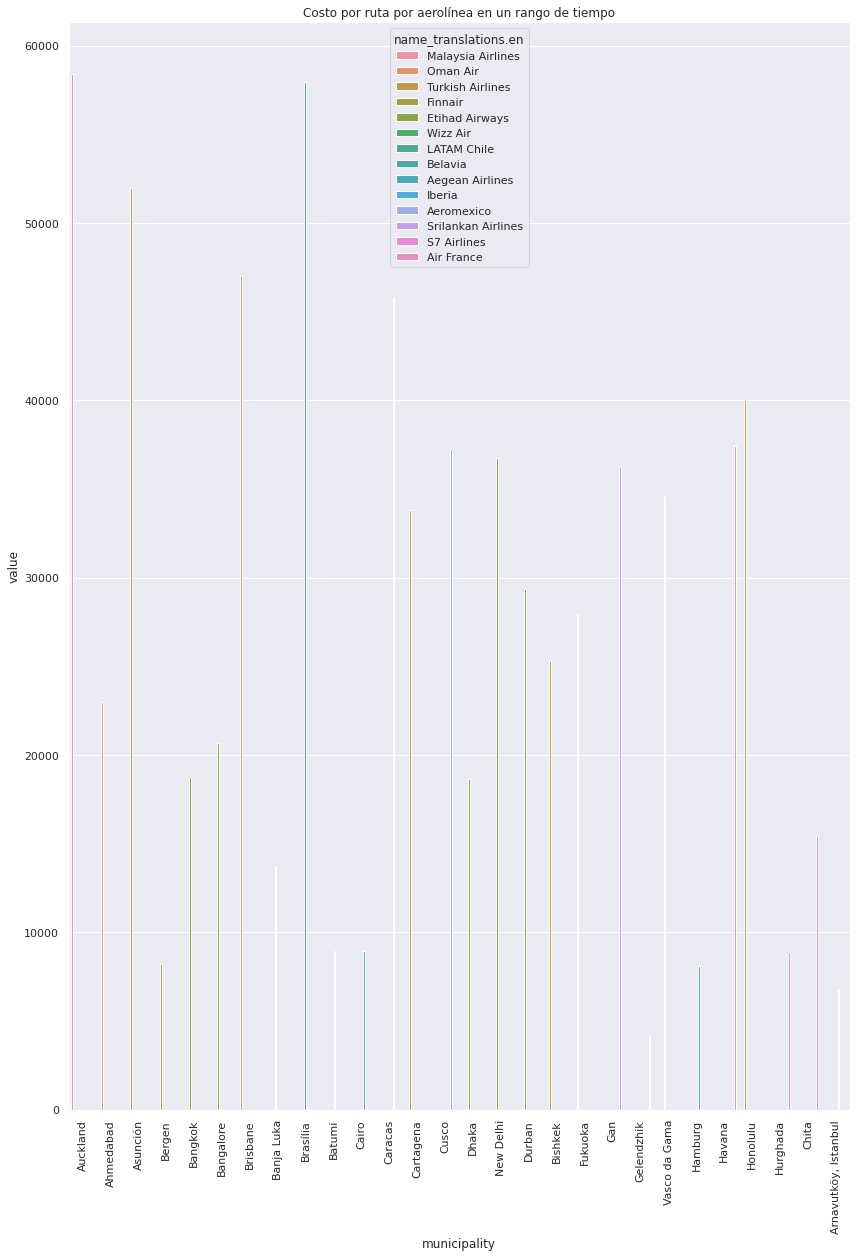

In [63]:
sns.set(rc={"figure.figsize":(14,20)})
sns.barplot(x ="municipality", y ="value", data = ticket_dataset_fecha_g, hue = 'name_translations.en')
plt.title("Costo por ruta por aerolínea en un rango de tiempo")
plt.xticks(rotation= 90);
plt.show()